In [36]:
import numpy as np
import matplotlib.pyplot as plt

Vecteurs de noeuds et degré:

In [37]:
t1 = np.array([0, 0, 1/4, 1/2, 3/4, 1, 1])      # Les 0 répétés au début et les 1 répétés à la fin “collent” les extrémités de la courbe aux points de contrôle extrêmes
t2 = np.array([0, 0, 1/5, 2/5, 3/5, 4/5, 1, 1]) # et assurent que la première et la dernière fonction de base s’annulent exactement à l’extérieur du domaine [0,1]x[0,1].
p = 1                                           # degré 1 -> linéaire

Fonction pour faire une B-spline 1D de degré 1 (en chapeau)

In [38]:
#Fonction B-spline 1D de degré 1 (en chapeau)
def B(i, x, t):
    y = np.zeros_like(x)

    # Partie montante (intervalle [t_i, t_{i+1}))
    if t[i+1] > t[i]:
        mask1 = (x >= t[i]) & (x < t[i+1])
        y[mask1] = (x[mask1] - t[i]) / (t[i+1] - t[i])

    # Partie descendante (intervalle [t_{i+1}, t_{i+2}))
    if t[i+2] > t[i+1]:
        mask2 = (x >= t[i+1]) & (x < t[i+2])
        y[mask2] = (t[i+2] - x[mask2]) / (t[i+2] - t[i+1])

    # Cas particulier du dernier nœud (pour x = t[-1])
    if i == len(t) - 3 and np.any(x == t[-1]):
        y[x == t[-1]] = 1.0

    return y

In [39]:
#Discrétisation de la grille 2D
nx, ny = 1000, 1000
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)

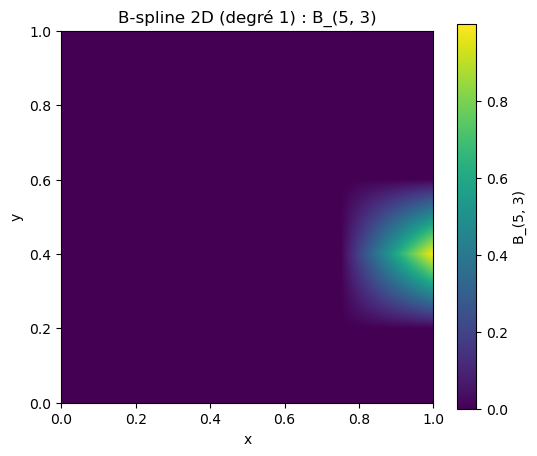

In [40]:
#calcul des splines
i, j = 4, 2  #attention en Python on décale de 1 car on commence à 0
Bx = B(i, X, t1)
By = B(j, Y, t2)
Bxy = Bx * By #on fait simplement le produit de chaque composante des vecteurs

plt.figure(figsize=(6,5))
plt.imshow(Bxy, extent=[0,1,0,1], origin='lower', cmap='viridis')
plt.colorbar(label=f'B_{i+1,j+1}')
plt.title(f'B-spline 2D (degré 1) : B_{i+1,j+1}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


On retrouve les résultats de la thèse (page 28) ! Il suffit de jouer avec les indices i et j (attention au décalage)

In [ ]:
#Construction de la MATRICE DE BASE 1D pour x et y
nBx = len(t1) - p - 1
nBy = len(t2) - p - 1

Bx_mat = np.zeros((nx, nBx))
By_mat = np.zeros((ny, nBy))

for a in range(nBx):
    Bx_mat[:, a] = B(a, x, t1)
for b in range(nBy):
    By_mat[:, b] = B(b, y, t2)

# Construction de la MATRICE 2D tensorielle
# Produit de Kronecker entre By et Bx
Bxy_mat = np.kron(By_mat, Bx_mat)

print(f"Matrice Bx (1D): {Bx_mat.shape}")
print(f"Matrice By (1D): {By_mat.shape}")
print(f"Matrice Bxy (2D): {Bxy_mat.shape}")

Matrice Bx (1D): (1000, 5)
Matrice By (1D): (1000, 6)
Matrice Bxy (2D): (1000000, 30)


La premiere dimension correspond au nombre de points de la discretisation